In [44]:
# 数学基础学习笔记
import torch
x=torch.arange(12)
print(x)
print(x.shape)
print(x.numel())
X=x.reshape(3,4)
print(X)
torch.zeros((2,3,4))

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
torch.Size([12])
12
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [15]:
import torch
x=torch.tensor([1.0,2,4,8])
y=torch.tensor([2,2,2,2])
x+y
torch.exp(x)
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)
X==Y
X.sum()
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

In [80]:
# 数学基础学习笔记
       # 线性代数
import torch
x = torch.arange(4,dtype=torch.float32)
print(x)
print(len(x))
print(x.shape)
# 向量或轴的维度被用来表示向量或轴的长度，即向量或轴的元素数量。 然而，张量的维度用来表示张量具有的轴数。 在这个意义上，张量的某个轴的维数就是这个轴的长度。
A = torch.arange(20).reshape(4,5)
# print(A)
A.T   #A的转置
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)  #torch仅支持想同类型元素进行运算，而默认生成的类型是int64，dtype=float32的作用是生成该类型
B = A.clone()  # 通过分配新内存，将A的一个副本分配给B
print(A)
A, A + B
A.sum()  #求所有元素之和
A_sum_axis0 = A.sum(axis=0) #降维求和：axis=0，每列求和；axis=1，每行求和
print(A_sum_axis0)
A.mean()  #求A中所有元素的平均值
sum_A = A.sum(axis=1, keepdims=True)  #计算总和或均值时保持轴数不变
A.cumsum(axis=0)  #沿某个轴逐行计算和
y = torch.ones(4, dtype = torch.float32)
x, y, torch.dot(x, y)  # 点积
A.shape, x.shape, torch.mv(A,x) #矩阵-向量积：A的列维数（沿轴1的长度）必须与x的维数（其长度）相同
B = torch.ones(4, 3)
torch.mm(A, B)  #矩阵乘法
# L2范数
u = torch.tensor([3.0, -4.0])
torch.norm(u)
# L1范数
torch.abs(u).sum()
         # 自动微分
x = torch.ones(2, 2, requires_grad=True)
x.grad_fn  #None x这种直接创建的称为叶子节点，叶子节点对应的grad_fn是None
y=x+3  
y.grad_fn  #<AddBackward0 object at 0x0000025EB5E80550>
z = y * y * 3
 
out = z.mean()
 
print(z, out)
out.backward()
x.grad

tensor([0., 1., 2., 3.])
4
torch.Size([4])
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])
tensor([40., 45., 50., 55.])
tensor([[48., 48.],
        [48., 48.]], grad_fn=<MulBackward0>) tensor(48., grad_fn=<MeanBackward0>)


tensor([[6., 6.],
        [6., 6.]])

features: tensor([0.7901, 0.2675]) 
label: tensor([4.8730])
tensor([[ 1.6210,  0.4714],
        [-1.2079,  1.8840],
        [-1.2318, -0.3364],
        [-0.3267,  0.9583],
        [ 0.5197,  0.0982],
        [-1.0247,  0.9401],
        [-0.8924, -0.7250],
        [-0.1196, -0.2011],
        [ 0.4104,  0.5606],
        [-0.0285,  0.5803]]) 
 tensor([[ 5.8365],
        [-4.6240],
        [ 2.8705],
        [ 0.2994],
        [ 4.9144],
        [-1.0544],
        [ 4.8809],
        [ 4.6451],
        [ 3.0969],
        [ 2.1846]])
epoch 1, loss 0.039577
epoch 2, loss 0.000153
epoch 3, loss 0.000050
w的估计误差: tensor([ 0.0003, -0.0001], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0006], grad_fn=<RsubBackward1>)


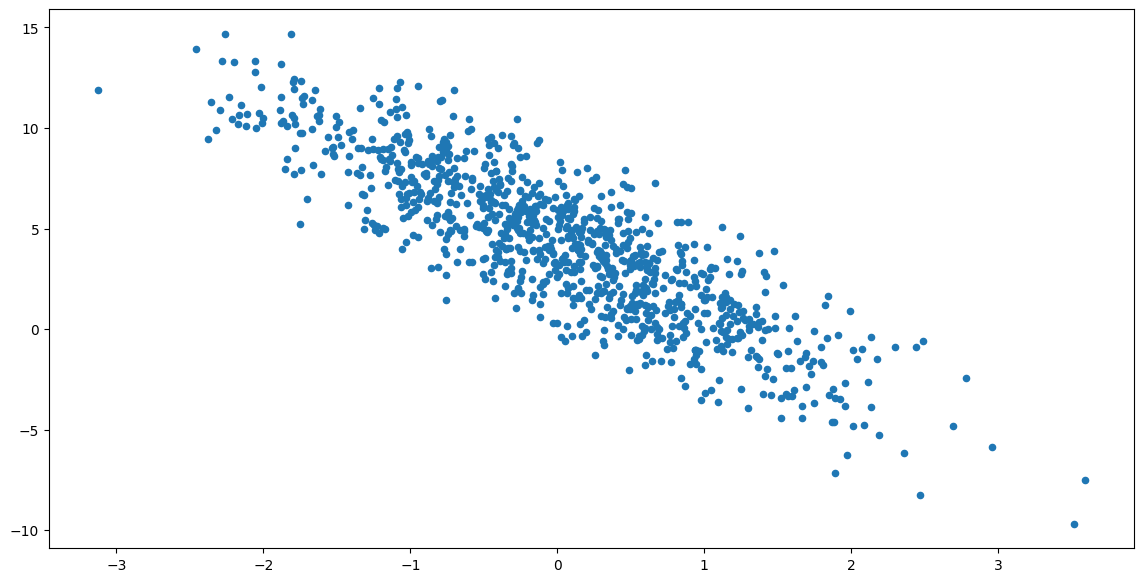

In [134]:
# 线性回归学习笔记
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
import time
import random
import torch
def synthetic_data(w, b, num_examples):  
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))  # normal：返回一个张量，包含从给定参数means,std的离散正态分布中抽取随机数。
    y = torch.matmul(X, w) + b   # matmul:矩阵相乘
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))
true_w = torch.tensor([2, -3.4])  #权重
true_b = 4.2  # 超参数
features, labels = synthetic_data(true_w, true_b, 1000)
print('features:', features[0],'\nlabel:', labels[0])
plt.figure(figsize=(14,7))  # 不用d2l库绘制图表
plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 20);
def data_iter(batch_size, features, labels):  #batch_size 批量大小
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)   #打乱顺序
    for i in range(0, num_examples, batch_size):  #起始、终止和步长
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])  #防止批量数据过小超出
        yield features[batch_indices], labels[batch_indices]  #迭代，每次调用返回一个x，一个y
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
def linreg(X, w, b):  #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b

def squared_loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2


def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad(): #使用 torch.no_grad()，无需计算梯度，可以节省计算资源并减少内存消耗
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()  #python不会自动将梯度设为0，手动设梯度为0，防止两次梯度计算有相关

lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad(): 
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

torch.float32
torch.Size([1, 60000, 784])
tensor(0.)
tensor(0.0039)
60000


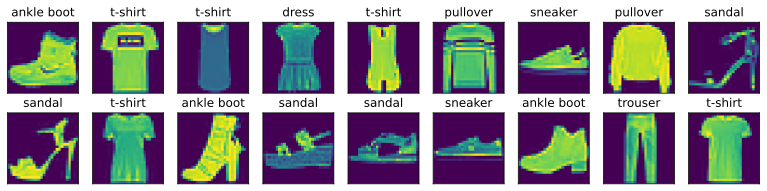

In [135]:
# FashionMNIST学习笔记
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch.utils import data
from torchvision import transforms
from torchvision.transforms import ToTensor
%matplotlib inline
%config InlineBackend.figure_format = 'svg'  #输出svg矢量图格式

def load_mnist(path, kind='train'):  
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels



# 利用github上所给代码导入FashionMNIST数据集，图像和标签数据集分别存放在image和label里
image_train, label_train = load_mnist('D:\DataSet', kind='train')  #FashionMNIST数据集文件存放在D盘DataSet文件夹中
image_test, label_test = load_mnist('D:\DataSet', kind='t10k')
mnist_train=[image_train, label_train]
'''以下代码将图像数据转换为 32 位浮点数格式，并进行归一化'''

transform = ToTensor()

# 对图像数据应用转换
image_transformed = transform(image_train)

print(image_transformed.dtype)  # 输出 torch.float32
print(image_transformed.shape)  # 输出 torch.Size([C, H, W])

# 归一化处理
image_normalized = image_transformed / 255.0

print(image_normalized.min())   
print(image_normalized.max())   

print(len(image_train))

def get_fashion_mnist_labels(labels):  
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes
def loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

X = next(iter(data.DataLoader(image_train, batch_size=18)))
y = next(iter(data.DataLoader(label_train, batch_size=18)))

"""
迭代器的基本方法:iter()、next()
迭代器是一个可以记住遍历的位置的对象。
迭代器对象从集合的第一个元素开始访问，直到所有的元素被访问完结束。迭代器只能往前不会后退。
"""

show_images(X.reshape(18, 28, 28), 2,9,titles=get_fashion_mnist_labels(y) );
batch_size = 256

def get_dataloader_workers():  
    """使用4个进程来读取数据"""
    return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                             num_workers=get_dataloader_workers())



# def load_data_fashion_mnist(batch_size, resize=None):
#         # 利用github上所给代码导入FashionMNIST数据集，图像和标签数据集分别存放在image和label里
#     image_train, label_train = load_mnist('D:\DataSet', kind='train')  #FashionMNIST数据集文件存放在D盘DataSet文件夹中
#     image_test, label_test = load_mnist('D:\DataSet', kind='t10k')
   

请输入批量大小：1000
2302.544599056244 106.0 1000.0


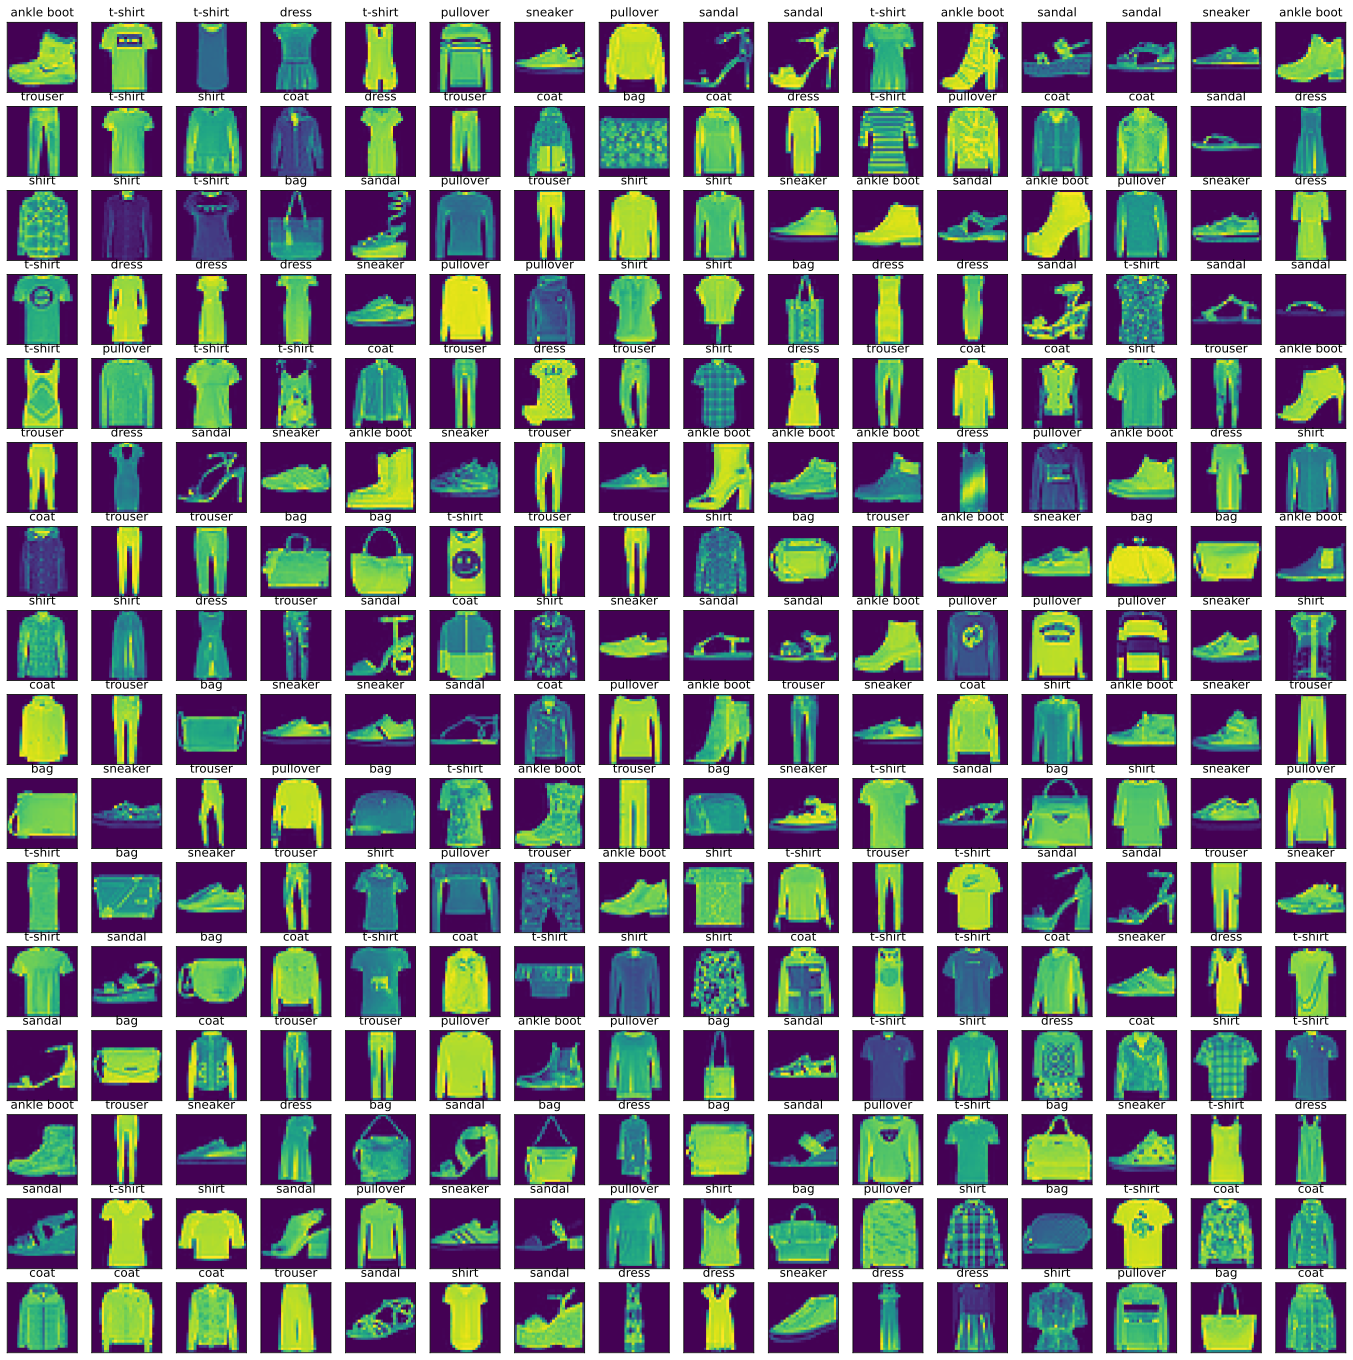

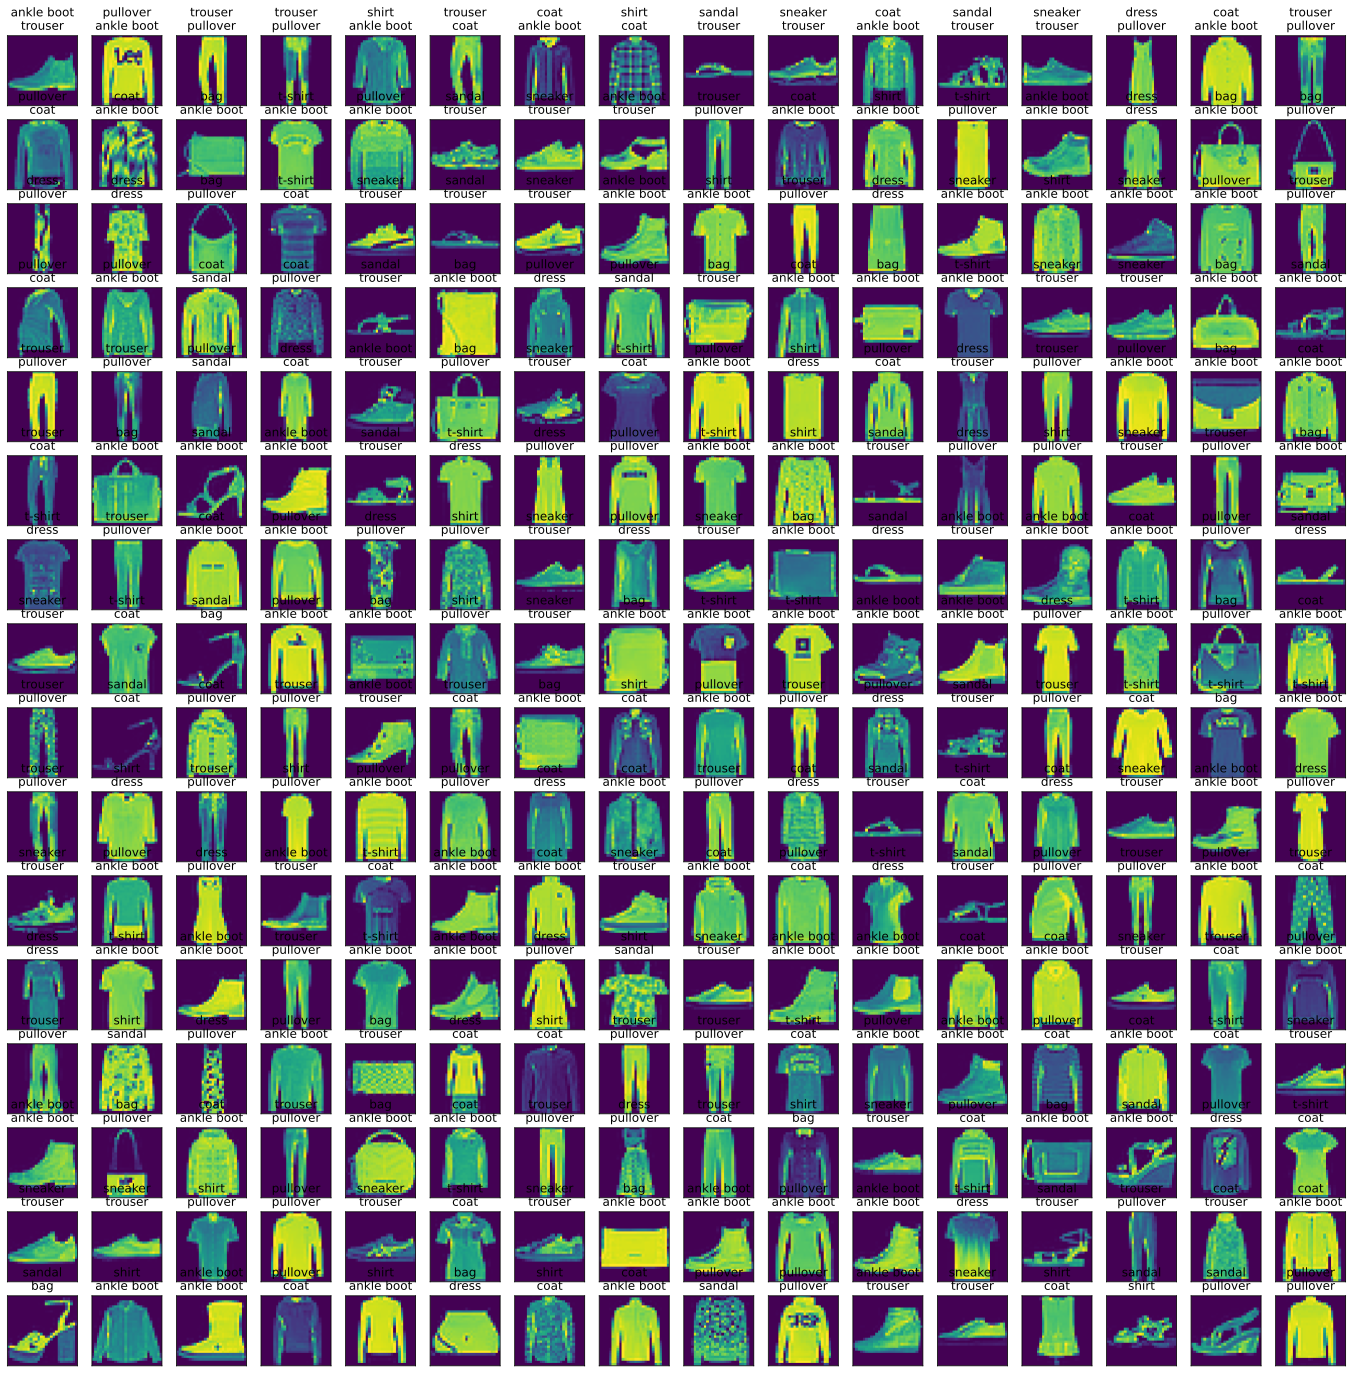

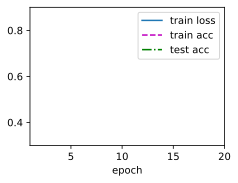

2302.186732530594 110.0 1000.0
2301.8280143737793 117.0 1000.0
2301.4684023857117 128.0 1000.0
2301.1078748703003 129.0 1000.0
2300.7463948726654 136.0 1000.0
2300.383953809738 142.0 1000.0
2300.020493745804 144.0 1000.0
2299.656013727188 151.0 1000.0
2299.2904572486877 157.0 1000.0
2298.923807621002 167.0 1000.0
2298.5560381412506 169.0 1000.0
2298.1871156692505 176.0 1000.0
2297.8170025348663 187.0 1000.0
2297.4456775188446 189.0 1000.0
2297.0730962753296 191.0 1000.0
2296.6992263793945 195.0 1000.0
2296.324059009552 198.0 1000.0
2295.9475378990173 201.0 1000.0
2295.5696370601654 200.0 1000.0


AssertionError: 2.2955696370601655

In [164]:
#sofemax学习笔记
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch.utils import data
from torchvision import transforms
from torchvision.transforms import ToTensor
%matplotlib inline
%config InlineBackend.figure_format = 'svg'  #输出svg矢量图格式

def load_mnist(path, kind='train'):  
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp / partition  # 这里应用了广播机制

"""将输入矩阵X与权重矩阵w相乘后与偏置b矩阵相加，最后通过softmax函数转化为概率分布"""
def net(X):
    X=X.to(torch.float)
    X_hat=torch.matmul(X.reshape((-1, W.shape[0])), W) + b
    return softmax(X_hat)


"""实现交叉熵损失函数"""
def cross_entropy(y_hat, y):#y_hat:预测概率分布,y:真实标签
    return - torch.log(y_hat[range(len(y_hat)), y])
#     return (y_hat - y.reshape(len(y_hat))) ** 2 / 2


def accuracy(y_hat, y):  
    """计算预测正确的数量"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)  #通过前后y_hat张量输出的不同可以看出此行代码的作用是返回概率最大的列号，并与真值比较
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

def evaluate_accuracy(net, data_iter):  
    """计算在指定数据集上模型的精度"""
    if isinstance(net, torch.nn.Module):   #检查一个对象是否属于某个特定的类或类型
        net.eval()  # 将模型设置为评估模式 在评估模式下，模型不会进行梯度更新，而是用于计算评估指标，如准确率、损失函数值等
    metric = Accumulator(2)  # 正确预测数、预测总数
    with torch.no_grad():
        for X, y in zip(data_iter[0],data_iter[1]):
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

class Accumulator:  
    """在n个变量上累加"""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args): # *（args）：*表示接受任意数量的参数，处理不确定数量的输入参数
        self.data = [a + float(b) for a, b in zip(self.data, args)] #列表推导式，zip() 函数将特征数据和标签数据一一配对

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]
    
num_inputs = 784
num_outputs = 10

W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.ones(num_outputs, requires_grad=True)

def train_epoch_ch3(net, train_iter, loss, updater):  
    """训练模型一个迭代周期"""
#     # 将模型设置为训练模式
    if isinstance(net, torch.nn.Module):
        net.train()
    # 训练损失总和、训练准确度总和、样本数
    metric = Accumulator(3)
    for X, y in zip(train_iter[0],train_iter[1]):
        # 计算梯度并更新参数
        y_hat = net(X)
        y = torch.unsqueeze(y, 0)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # 使用PyTorch内置的优化器和损失函数
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            # 使用定制的优化器和损失函数
            l.sum().backward()
            updater(X.shape[0])
        metric.add(float(l.sum()),accuracy(y_hat, y),  y.numel())
    # 返回训练损失和训练精度
    print(metric[0],metric[1],metric[2])
    return metric[0] / metric[2], metric[1] / metric[2]

class Animator:
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        plt.rcParams['figure.figsize'] = figsize
        self.fig, self.axes = plt.subplots(nrows, ncols)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: self._set_axes(self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        plt.show()
    
    @staticmethod
    def _set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
        axes.set_xlabel(xlabel)
        axes.set_ylabel(ylabel)
        axes.set_xscale(xscale)
        axes.set_yscale(yscale)
        axes.set_xlim(xlim)
        axes.set_ylim(ylim)
        if legend:
            axes.legend(legend)

    
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  
    """训练模型"""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc
    
def sgd(params, lr, batch_size):  
    """小批量随机梯度下降"""
    with torch.no_grad(): #使用 torch.no_grad()，无需计算梯度，可以节省计算资源并减少内存消耗
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()  #python不会自动将梯度设为0，手动设梯度为0，防止两次梯度计算有相关

def updater(batch_size):
    return sgd([W, b], lr, batch_size)

def get_fashion_mnist_labels(labels):  
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]


def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes
batch_size_input=int(input("请输入批量大小："))
num_epochs = 20
lr = 0.01
image_train, label_train = load_mnist('D:\DataSet', kind='train')  #FashionMNIST数据集文件存放在D盘DataSet文件夹中
image_test, label_test = load_mnist('D:\DataSet', kind='t10k')


X_train = next(iter(data.DataLoader(image_train, batch_size=batch_size_input)))
X_train = X_train.to(torch.float)
X_train = X_train / 255.0
y_train = next(iter(data.DataLoader(label_train, batch_size=batch_size_input)))
X_test = next(iter(data.DataLoader(image_test, batch_size=batch_size_input)))
X_test = X_test.to(torch.float)
X_test = X_test / 255.0
y_test = next(iter(data.DataLoader(label_test, batch_size=batch_size_input)))


train_iter=[X_train,y_train]
test_iter=[X_test,y_test]
show_images(train_iter[0].reshape(batch_size_input, 28, 28), 16,16,titles=get_fashion_mnist_labels(train_iter[1]) );
def predict_ch3(net, test_iter, n=6): 
    """预测标签"""
    trues = get_fashion_mnist_labels(test_iter[1])
    preds = get_fashion_mnist_labels(net(test_iter[0]).argmax(axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    show_images(
        test_iter[0].reshape((batch_size_input, 28, 28)), 16,16 , titles=titles[0:256])
loss = nn.CrossEntropyLoss(reduction='none')           
predict_ch3(net, test_iter)
# predict_ch3(net, test_iter)
train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)


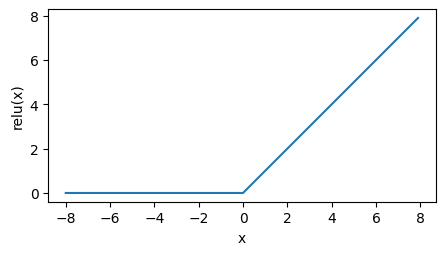

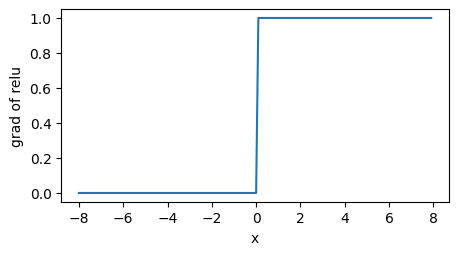

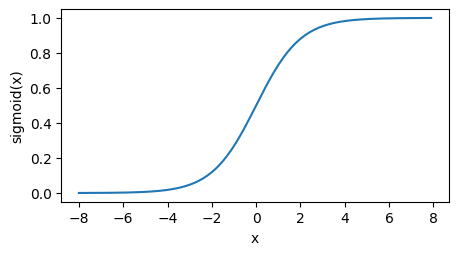

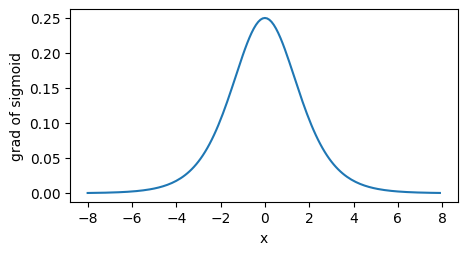

In [2]:
#多层感知机学习笔记
import matplotlib.pyplot as plt
%matplotlib inline
import torch
from torch import nn  #从PyTorch库中导入nn模块，nn模块提供了各种用于构建神经网络模型的类和函数
def plot_without_d2l(x_fnc,y_fnc,xlabel,ylabel,length,width):
    plt.figure(figsize=(length,width))
    plt.plot(x_fnc,y_fnc)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
plot_without_d2l(x.detach(), y.detach(),'x','relu(x)',5,2.5)
y.backward(torch.ones_like(x), retain_graph=True)
plot_without_d2l(x.detach(), x.grad, 'x', 'grad of relu',5,2.5)
y = torch.sigmoid(x)
plot_without_d2l(x.detach(), y.detach(), 'x', 'sigmoid(x)', 5, 2.5)
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
plot_without_d2l(x.detach(), x.grad, 'x', 'grad of sigmoid', 5, 2.5)
import numpy as np
from torch.utils import data
def load_mnist(path, kind='train'):  
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels
batch_size = 256

请输入批量大小：500


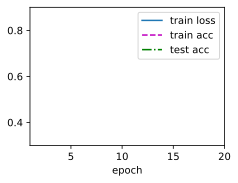

train_loss and train_acc: (1.9242403899431229, 0.316) test_acc: 0.544


<Figure size 350x250 with 0 Axes>

train_loss and train_acc: (1.1581791520603002, 0.572) test_acc: 0.582


<Figure size 350x250 with 0 Axes>

train_loss and train_acc: (0.8868448332529515, 0.688) test_acc: 0.678


<Figure size 350x250 with 0 Axes>

train_loss and train_acc: (0.7392012564782053, 0.748) test_acc: 0.698


<Figure size 350x250 with 0 Axes>

train_loss and train_acc: (0.6310060036287177, 0.782) test_acc: 0.716


<Figure size 350x250 with 0 Axes>

train_loss and train_acc: (0.5483944373799313, 0.812) test_acc: 0.732


<Figure size 350x250 with 0 Axes>

train_loss and train_acc: (0.4841963667748496, 0.854) test_acc: 0.742


<Figure size 350x250 with 0 Axes>

train_loss and train_acc: (0.43058614241017495, 0.876) test_acc: 0.736


<Figure size 350x250 with 0 Axes>

train_loss and train_acc: (0.3862520726556977, 0.886) test_acc: 0.74


<Figure size 350x250 with 0 Axes>

train_loss and train_acc: (0.3448017721763681, 0.904) test_acc: 0.744


<Figure size 350x250 with 0 Axes>

train_loss and train_acc: (0.3066301436512731, 0.912) test_acc: 0.74


<Figure size 350x250 with 0 Axes>

train_loss and train_acc: (0.2730905175805092, 0.928) test_acc: 0.744


<Figure size 350x250 with 0 Axes>

train_loss and train_acc: (0.24518930063918015, 0.932) test_acc: 0.736


<Figure size 350x250 with 0 Axes>

train_loss and train_acc: (0.2182192546160095, 0.942) test_acc: 0.73


<Figure size 350x250 with 0 Axes>

train_loss and train_acc: (0.19207076702718587, 0.95) test_acc: 0.732


<Figure size 350x250 with 0 Axes>

train_loss and train_acc: (0.1661134285499702, 0.96) test_acc: 0.726


<Figure size 350x250 with 0 Axes>

train_loss and train_acc: (0.1452390967850233, 0.966) test_acc: 0.732


<Figure size 350x250 with 0 Axes>

train_loss and train_acc: (0.12749064402693147, 0.976) test_acc: 0.768


<Figure size 350x250 with 0 Axes>

train_loss and train_acc: (0.12375507346287794, 0.968) test_acc: 0.78


<Figure size 350x250 with 0 Axes>

train_loss and train_acc: (0.10745252214735636, 0.972) test_acc: 0.778
无法顺利可视化，用文字替代。


In [160]:
"""Day 3 非简洁实现"""
import torch
from torch import nn  #从PyTorch库中导入nn模块，nn模块提供了各种用于构建神经网络模型的类和函数
import numpy as np
from torch.utils import data
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
%matplotlib inline

def load_mnist(path, kind='train'):  
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`  不使用教材中的加载数据集方式"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

"""将输入矩阵X与权重矩阵w相乘后与偏置b矩阵相加，最后通过softmax函数转化为概率分布"""
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1)  # 这里“@”代表矩阵乘法
    return (H@W2 + b2)

def accuracy(y_hat, y):  
    """计算预测正确的数量"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)  #通过前后y_hat张量输出的不同可以看出此行代码的作用是返回概率最大的列号，并与真值比较
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

def evaluate_accuracy(net, data_iter):  
    """计算在指定数据集上模型的精度"""
    if isinstance(net, torch.nn.Module):   #检查一个对象是否属于某个特定的类或类型
        net.eval()  # 将模型设置为评估模式 在评估模式下，模型不会进行梯度更新，而是用于计算评估指标，如准确率、损失函数值等
    metric = Accumulator(2)  # 正确预测数、预测总数
    with torch.no_grad():
        for X, y in zip(data_iter[0],data_iter[1]):
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

class Accumulator:  
    """在n个变量上累加"""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args): # *（args）：*表示接受任意数量的参数，处理不确定数量的输入参数
        self.data = [a + float(b) for a, b in zip(self.data, args)] #列表推导式，zip() 函数将特征数据和标签数据一一配对

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]
    
def train_epoch_ch3(net, train_iter, loss, updater):  
    """训练模型一个迭代周期"""
#     # 将模型设置为训练模式
    if isinstance(net, torch.nn.Module):
        net.train()
    # 训练损失总和、训练准确度总和、样本数
    metric = Accumulator(3)
    for X, y in zip(train_iter[0],train_iter[1]):
        # 计算梯度并更新参数
        y_hat = net(X)
        y = torch.unsqueeze(y, 0)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # 使用PyTorch内置的优化器和损失函数
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            # 使用定制的优化器和损失函数
            l.sum().backward()
            updater(X.shape[0])
        metric.add(float(l.sum()),accuracy(y_hat, y),  y.numel())
    # 返回训练损失和训练精度
    return metric[0] / metric[2], metric[1] / metric[2]

class Animator:
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        plt.rcParams['figure.figsize'] = figsize
        self.fig, self.axes = plt.subplots(nrows, ncols)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: self._set_axes(self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        plt.draw();plt.pause(0.001)
        plt.show()
    
    @staticmethod
    def _set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
        axes.set_xlabel(xlabel)
        axes.set_ylabel(ylabel)
        axes.set_xscale(xscale)
        axes.set_yscale(yscale)
        axes.set_xlim(xlim)
        axes.set_ylim(ylim)
        if legend:
            axes.legend(legend)

    
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  
    """训练模型"""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
        print("train_loss and train_acc:",train_metrics,"test_acc:",test_acc)
    print("无法顺利可视化，用文字替代。")
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

def get_fashion_mnist_labels(labels):  
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]


def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

num_inputs, num_outputs, num_hiddens = 784, 10, 256
"""num_inputs表示输入层的神经元数量，即Fashion-mnist图像的像素数目（784）。
   num_outputs表示输出层的神经元数量，即所需分类的类别数目（10）。
   num_hiddens表示隐藏层的神经元数量，即中间隐藏层的宽度（256）。
"""
W1 = nn.Parameter(torch.randn(  #生成服从标准正态分布（均值为0，标准差为1）的随机数
    num_inputs, num_hiddens, requires_grad=True) * 0.01)  
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(
    num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]
#FashionMNIST数据集文件存放在D盘DataSet文件，加载数据集
image_train, label_train = load_mnist('D:\DataSet', kind='train')  
image_test, label_test = load_mnist('D:\DataSet', kind='t10k')

batch_size_input=int(input("请输入批量大小："))

X_train = next(iter(data.DataLoader(image_train, batch_size=batch_size_input)))
X_train = X_train.to(torch.float)   #转为可处理类型
X_train = X_train / 255.0   # X_train =(X_train+0.5)/0.5   实现归一化
y_train = next(iter(data.DataLoader(label_train, batch_size=batch_size_input)))

X_test = next(iter(data.DataLoader(image_test, batch_size=batch_size_input)))
X_test = X_test.to(torch.float)
X_test = X_test / 255.0   # X_test =(X_test+0.5)/0.5   实现归一化
y_test = next(iter(data.DataLoader(label_test, batch_size=batch_size_input)))

train_loader=[X_train,y_train]
test_loader=[X_test,y_test]

def relu(X):  #激活函数
    a = torch.zeros_like(X)
    return torch.max(X, a)

loss = nn.CrossEntropyLoss(reduction='none')  #调用交叉熵损失函数
num_epochs, lr = 20, 0.01
updater = torch.optim.SGD(params, lr=lr)

train_ch3(net, train_loader, test_loader, loss, num_epochs, updater)

In [133]:
"""Day 3 多层感知机简洁实现"""
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x


def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1)  # 这里“@”代表矩阵乘法
    return (H@W2 + b2)

#加载数据集
image_train, label_train = load_mnist('D:\DataSet', kind='train')  #FashionMNIST数据集文件存放在D盘DataSet文件夹中
image_test, label_test = load_mnist('D:\DataSet', kind='t10k')
batch_size_input=int(input("请输入批量大小："))
X_train = next(iter(data.DataLoader(image_train, batch_size=batch_size_input)))
X_train = X_train.to(torch.float)
X_train = X_train / 255.0   # X_train =(X_train+0.5)/0.5，归一化
y_train = next(iter(data.DataLoader(label_train, batch_size=batch_size_input)))

X_test = next(iter(data.DataLoader(image_test, batch_size=batch_size_input)))
X_test = X_test.to(torch.float)
X_test = X_test / 255.0   # X_test =(X_test+0.5)/0.5
y_test = next(iter(data.DataLoader(label_test, batch_size=batch_size_input)))

train_loader=[X_train,y_train]
test_loader=[X_test,y_test]

model = MLP()
criterion = nn.CrossEntropyLoss()
from torch import nn
from torch.utils.data import DataLoader
num_epochs = 10  #训练轮数
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(num_epochs):
    for images, labels in zip(train_loader[0],train_loader[1]):
        # 前向传播
        outputs = model(images)
        loss = criterion(outputs, labels)        
        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

model.eval()  # 设置模型为评估模式
with torch.no_grad():   #取消计算梯度
    correct = 0
    total = batch_size_input
    for images, labels in zip(test_loader[0],test_loader[1]):
        outputs = model(images)
        predicted = torch.argmax(outputs)
        if predicted.item() == labels.item(): #判断所得预测标签与实际是否相符
             correct += 1
    
    print(f'Accuracy on the test set: {100 * correct / total}%')

请输入批量大小：1000
Epoch [1/10], Loss: 0.3478323817253113
Epoch [2/10], Loss: 0.29199036955833435
Epoch [3/10], Loss: 0.46450275182724
Epoch [4/10], Loss: 0.4854326844215393
Epoch [5/10], Loss: 0.2103930413722992
Epoch [6/10], Loss: 0.040741272270679474
Epoch [7/10], Loss: 0.016837619245052338
Epoch [8/10], Loss: 0.0036663473583757877
Epoch [9/10], Loss: 0.0038463911041617393
Epoch [10/10], Loss: 0.004777445457875729
tensor(9) tensor(9, dtype=torch.uint8)
tensor(2) tensor(2, dtype=torch.uint8)
tensor(1) tensor(1, dtype=torch.uint8)
tensor(1) tensor(1, dtype=torch.uint8)
tensor(6) tensor(6, dtype=torch.uint8)
tensor(1) tensor(1, dtype=torch.uint8)
tensor(4) tensor(4, dtype=torch.uint8)
tensor(6) tensor(6, dtype=torch.uint8)
tensor(7) tensor(5, dtype=torch.uint8)
tensor(7) tensor(7, dtype=torch.uint8)
tensor(4) tensor(4, dtype=torch.uint8)
tensor(9) tensor(5, dtype=torch.uint8)
tensor(5) tensor(7, dtype=torch.uint8)
tensor(3) tensor(3, dtype=torch.uint8)
tensor(4) tensor(4, dtype=torch.uint8)
